In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Gradient Descent Visualization

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

## An Example for Contour Plots

In [55]:
x1 = np.linspace(-10.0, 10.0, 100)
x2 = np.linspace(-10.0, 10.0, 100)

In [7]:
X1, X2 = np.meshgrid(x1, x2)
Y = np.sqrt(X1**2/9 + X2**2/4)

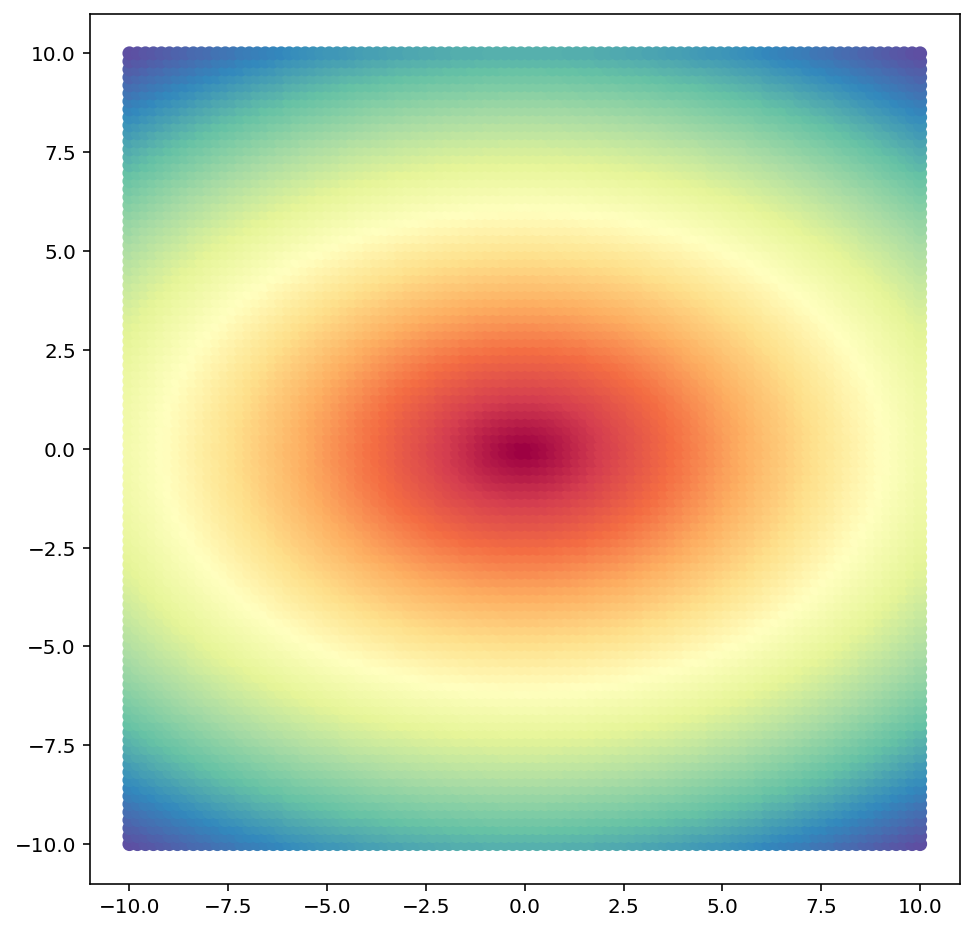

In [21]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1) 
cm = plt.cm.get_cmap('Spectral')
plt.scatter(X1, X2, c=Y, cmap=cm)
plt.show()

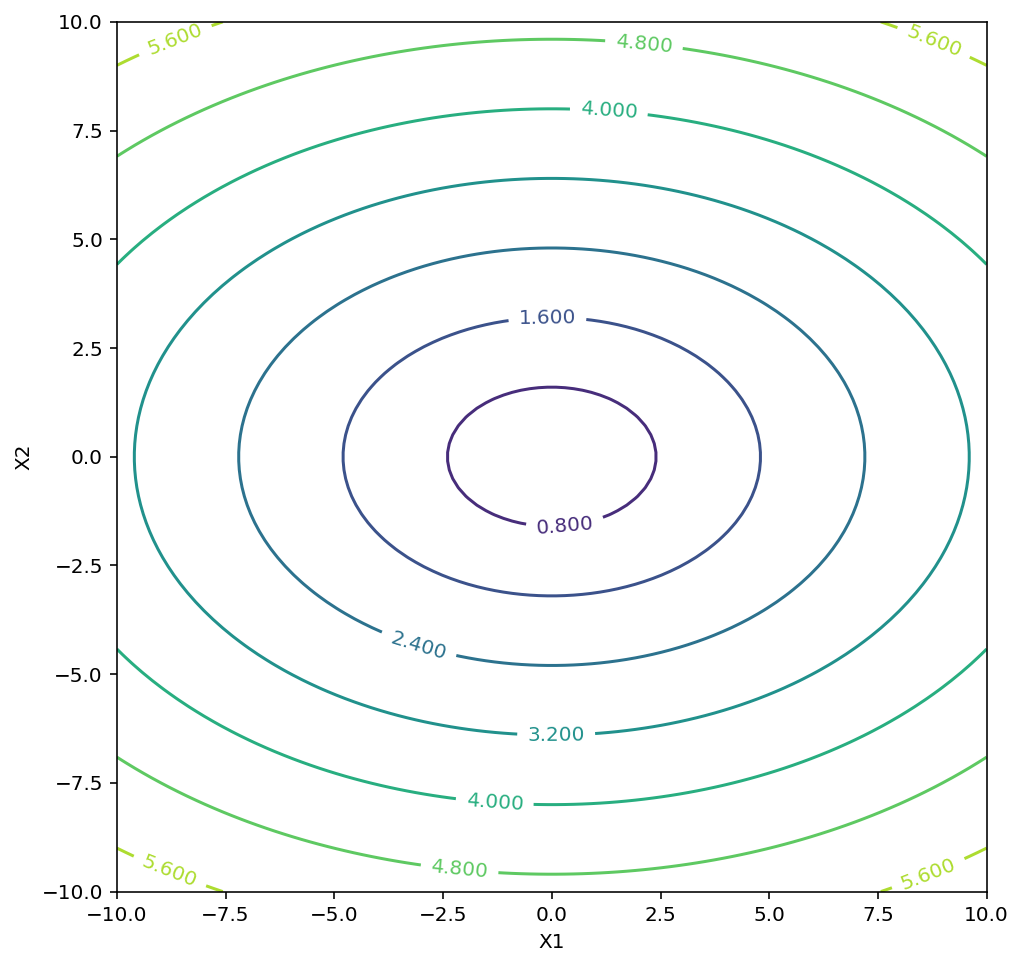

In [22]:
fig = plt.figure(figsize=(8, 8))
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1) 
cp = plt.contour(X1, X2, Y)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

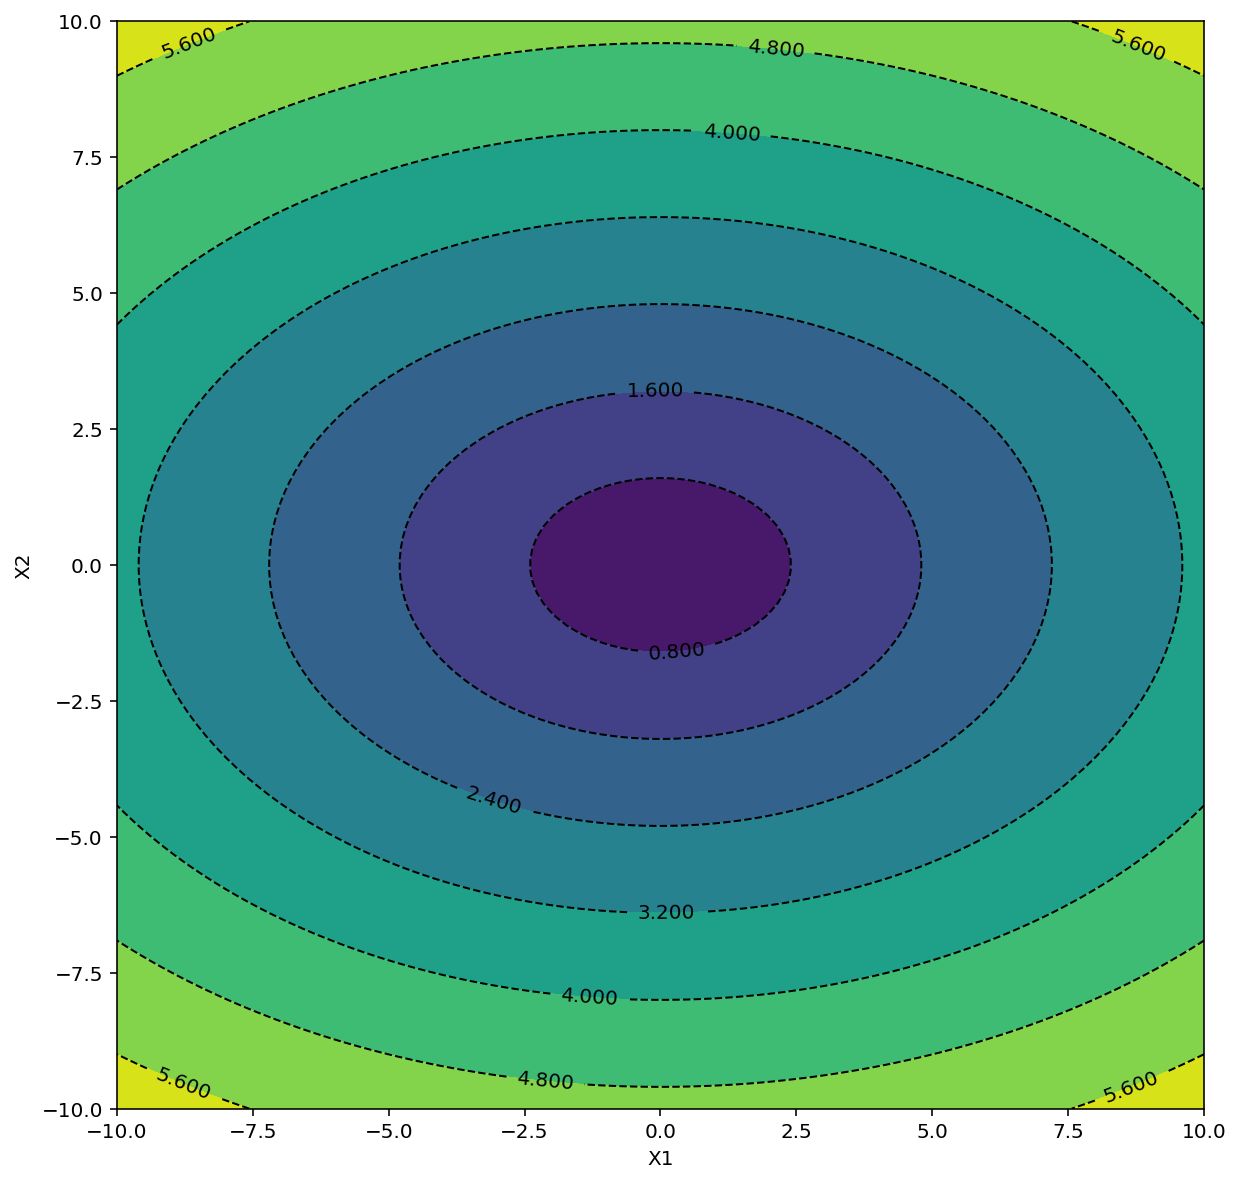

In [23]:
plt.figure(figsize=(10,10))
ax = plt.gca() #you first need to get the axis handle
ax.set_aspect(1) 
cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y, )
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## Real Data Application with Gradient Descent

In [25]:
data = pd.read_csv('drive/MyDrive/Data Sets/Advertising.csv')
y = data['Sales']
X = np.column_stack((data['TV'], data['Radio']))
 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [43]:
def gradient_mse(W, x, y):
    y_hat = x.dot(W).flatten()
    error = (y - y_hat)
    mse = (1.0 / len(x)) * np.sum(np.square(error))
    gradient = -(2.0 / len(x)) * error.dot(x)
    return gradient, mse

In [46]:
w = np.array((-40, -40))
alpha = .05
tolerance = 1e-5
 
old_w = []
errors = []

In [47]:
# Perform Gradient Descent
iterations = 1
for i in range(200):
    gradient, error = gradient_mse(w, X_scaled, y)
    new_w = w - alpha * gradient # here we update the coefficients in the direction of the negative gradient
 
    # Print error every 10 iterations
    if iterations % 10 == 0:
        print("Iteration: %d - Error: %.4f" % (iterations, error))
        old_w.append(new_w)
        errors.append(error)
 
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print('The Gradient Descent Algorithm has converged')
        break
 
    iterations += 1
    w = new_w
 
print('w =', w)

Iteration: 10 - Error: 732.6317
Iteration: 20 - Error: 256.7896
Iteration: 30 - Error: 205.5887
Iteration: 40 - Error: 200.0794
Iteration: 50 - Error: 199.4866
Iteration: 60 - Error: 199.4228
Iteration: 70 - Error: 199.4159
Iteration: 80 - Error: 199.4152
Iteration: 90 - Error: 199.4151
Iteration: 100 - Error: 199.4151
Iteration: 110 - Error: 199.4151
Iteration: 120 - Error: 199.4151
The Gradient Descent Algorithm has converged
w = [3.91836617 2.78408737]


In [48]:
all_ws = np.array(old_w)
 
# Just for visualization
errors.append(600)
errors.append(500)
errors.append(400)
errors.append(300)
errors.append(225)
 
levels = np.sort(np.array(errors))

In [36]:
levels

array([199.41507718, 199.41508574, 199.41516524, 199.41590397,
       199.4227686 , 199.48656054, 200.07938649, 205.5887133 ,
       225.        , 256.78961856, 300.        , 400.        ,
       500.        , 600.        , 732.63169338])

In [49]:
w0 = np.linspace(-w[0] * 5, w[0] * 5, 100)
w1 = np.linspace(-w[1] * 5, w[1] * 5, 100)
mse_vals = np.zeros(shape=(w0.size, w1.size))

In [50]:
for i, value1 in enumerate(w0):
    for j, value2 in enumerate(w1):
        w_temp = np.array((value1,value2))        
        mse_vals[i, j] = gradient_mse(w_temp, X_scaled, y)[1]


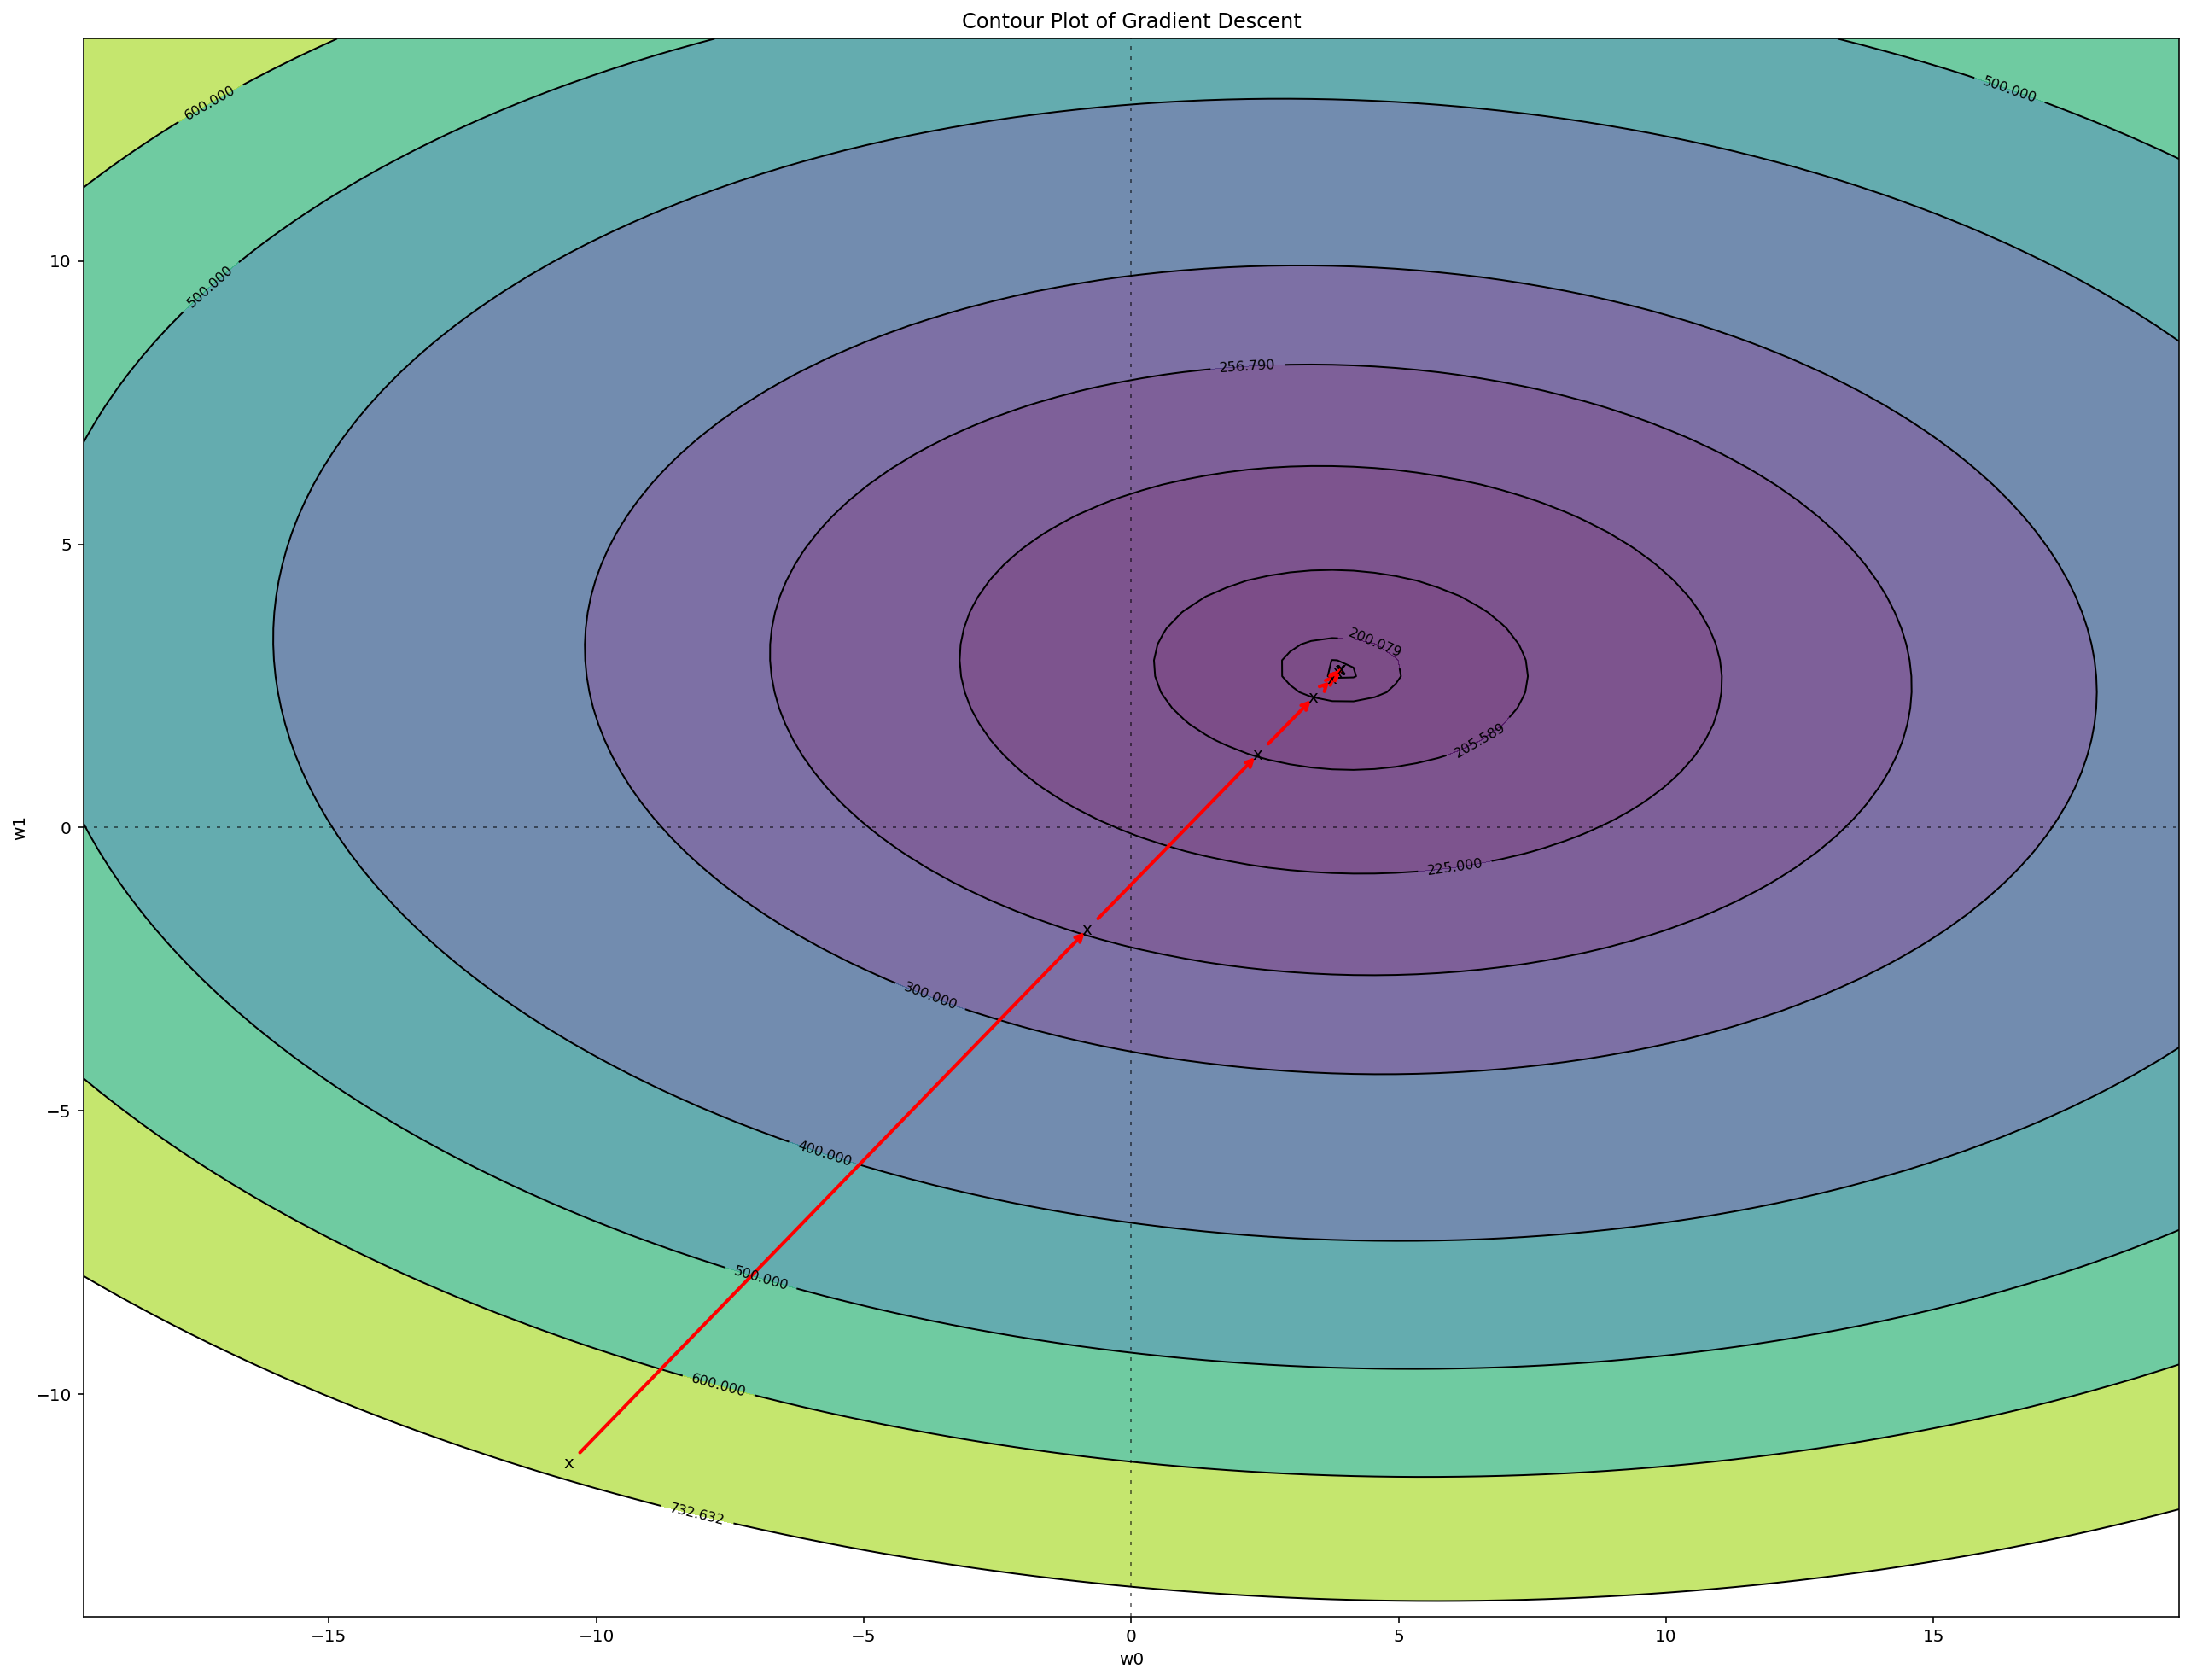

In [52]:
plt.figure(figsize=(22,17))
plt.contourf(w0, w1, mse_vals, levels,alpha=.7)
plt.axhline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
for i in range(len(old_w) - 1):
    plt.annotate('x', xy=all_ws[i + 1, :], xytext=all_ws[i, :],
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 2},
                 va='center', ha='center')
 
CS = plt.contour(w0, w1, mse_vals, levels, linewidths=1,colors='black')
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Contour Plot of Gradient Descent")
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()